## Using RNN for feature extraction from audio input

The internet suggest we should use RNN on spectogram (as omer did with cnn) by considering each column of the spectogram as the current input (in the time dimension) and then using the recurrent network.

I will train RNN both on spectograms and on the raw audio features and compare the results but first few data processing.

### Data processing:

For each song, we will focus only on the chorus. The idea behind this is both in term of performance and in term of computations. In terms of performance, the chorus contains the whole message of the song in just a few lines and also it will be the most powerful, highest energy, loudest, catchiest, and most memorable part of any song. Thus, it make sense that most tiktokers will choose this part for their video. In addition, in term of computation, working on shorter audio file (only the chorus compared to the whole song) / smaller spectogram will require less computations.

In order to do so, we will use pychorus library.

In [39]:
import sys; sys.path.append('..')

from src.utils.audio_utils import find_chorus
import matplotlib.pyplot as plt
from IPython.display import Audio
import pandas as pd
import torchaudio
import librosa
import os

In [52]:
x, sr = librosa.load('../data/audio/00QH0dk4fdur44J1lfbhqv.wav')
start = int(find_chorus('../data/audio/00QH0dk4fdur44J1lfbhqv.wav', 30))

Best chorus found at 3 min 53.40 sec


And now let's plot the predicted chorus and hear it:

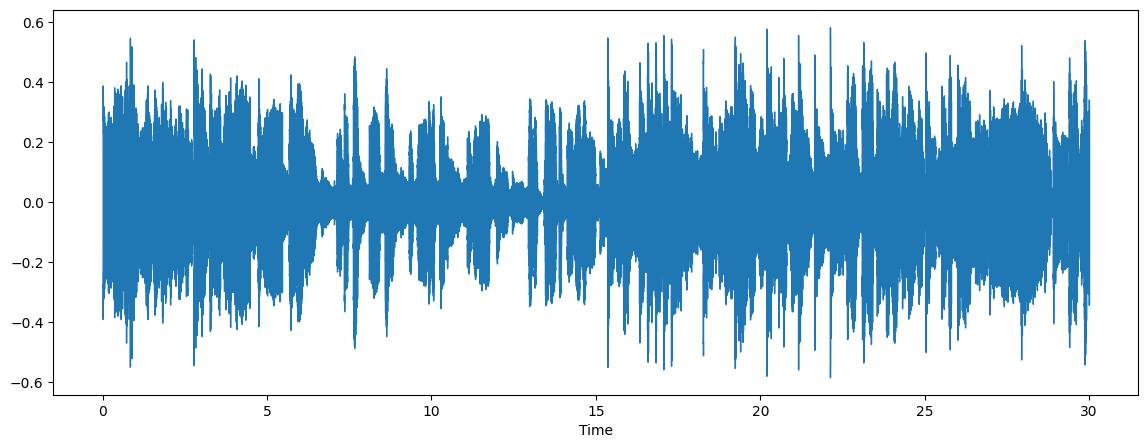

In [53]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x[start*sr:(start+30)*sr], sr=sr)

In [54]:
Audio(data = x[start*sr:(start+30)*sr], rate=sr)

In [58]:
x, sr = librosa.load('../data/00QH0dk4fdur44J1lfbhqv.wav')
start = int(find_chorus('../data/00QH0dk4fdur44J1lfbhqv.wav', 30))
Audio(data = x[start*sr:(start+30)*sr], rate=sr)

Best chorus found at 3 min 53.40 sec
